In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os, gc
# os.listdir()


In [2]:
train_df = pd.read_csv('store_data/new_feat/train_df_feat.csv')
test_df  = pd.read_csv('store_data/new_feat/test_df_feat.csv')
# sub      = pd.read_csv('sample_submission_24jSKY6.csv')
# info_df  = pd.read_excel('train_aox2Jxw/Data Dictionary.xlsx')
target = train_df['loan_default']
train_df.shape, test_df.shape

((233154, 55), (112392, 54))

In [3]:
inter_cols = ['disbursed_amount','asset_cost','supplier_id',
     'credit_hist_total_month', 'loan_tenure_total_month','PRI.CURRENT.BALANCE',
     'PRI.DISBURSED.AMOUNT','manufacturer_id',
     'Bureau_desc', 'bureau_score', 'State_ID', 'stat_skew','stat_median','ltv',
     'stat_std', 'stat_mean', 'branch_date_disbursed_mean','PRI.SANCTIONED.AMOUNT',
     'manufac_date_disbursed_mean','Current_pincode_ID', 'pay_by_yourself',
     'no_of_acc_overdue','NO.OF_INQUIRIES', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']

cat = ['credit_hist_total_month', 'branch_date_disbursed_mean',
       'asset_cost', 'loan_tenure_total_month',
       'state_week_disbursed_mean', 'branch_week_disbursed_mean',
       'manufac_week_disbursed_mean', 'Employment.Type', 'stat_std',
       'manufac_disbursedDate_mean', 'NO.OF_INQUIRIES', 'age(in years)',
       'no_of_acc_overdue', 'PRIMARY.INSTAL.AMT', 'branch_id',
       'Bureau_desc', 'pay_by_yourself', 'supplier_id', 'stat_skew',
       'branch_disbursed_mean', 'State_ID', 'bureau_score',
       'disbursed_amount', 'Current_pincode_ID', 'ltv']

xgb = ['PRI.CURRENT.BALANCE', 'pay_by_yourself',
       'manufac_week_disbursed_mean', 'loan_tenure_total_month',
       'credit_hist_total_month', 'state_week_disbursed_mean', 'State_ID',
       'branch_id', 'branch_disbursed_mean',
       'manufac_date_disbursed_mean', 'PRIMARY.INSTAL.AMT',
       'state_date_disbursed_mean', 'stat_mean', 'bureau_score',
       'branch_week_disbursed_mean', 'age(in years)','Employment.Type',
       'manufac_disbursedDate_mean', 'stat_std',
       'branch_date_disbursed_mean', 'asset_cost', 'stat_skew',
       'disbursed_amount', 'supplier_id', 'ltv', 'Current_pincode_ID']

lgb = ['loan_tenure_total_month', 'State_ID','age(in month)',
       'state_disbursedDate_mean', 'state_week_disbursed_mean',
       'PRIMARY.INSTAL.AMT', 'credit_hist_total_month',
       'manufac_week_disbursed_mean', 'age(in years)', 'branch_id',
       'manufac_date_disbursed_mean', 'state_date_disbursed_mean',
       'branch_disbursed_mean', 'stat_std', 'bureau_score', 'stat_mean',
       'manufac_disbursedDate_mean', 'branch_week_disbursed_mean',
       'branch_date_disbursed_mean', 'asset_cost', 'disbursed_amount',
       'stat_skew', 'ltv', 'supplier_id', 'Current_pincode_ID']
       
drop_cols = ['no_of_acc','new_acc_past_month','Aadhar_flag',
    'PAN_flag','SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS','SEC.SANCTIONED.AMOUNT',
    'SEC.DISBURSED.AMOUNT','SEC.OVERDUE.ACCTS','SEC.CURRENT.BALANCE','SEC.INSTAL.AMT',
    'Passport_flag','VoterID_flag']

# len(inter_cols), len(lgb), len(cat), len(xgb), len(drop_cols), \
# len(set(lgb + xgb + cat)), len(set(lgb + xgb + cat + inter_cols))
# len(set(lgb + xgb + cat))
use_cols = list(set(lgb + xgb + cat + inter_cols))
train_df[use_cols].shape

(233154, 36)

In [4]:
train_df = train_df[use_cols]
test_df  = test_df[use_cols]
print(train_df.shape, test_df.shape)
gc.collect()

(233154, 36) (112392, 36)


25

In [51]:
complete_df = pd.concat([train_df, test_df], axis=0)
col_to_use = complete_df.columns

complete_df.apply(lambda x: pd.Series.value_counts(x).shape[0])

state_date_disbursed_mean                2292
State_ID                                   22
PRIMARY.INSTAL.AMT                      34330
pay_by_yourself                         15558
PRI.CURRENT.BALANCE                     97465
manufac_date_disbursed_mean               910
branch_id                                  82
branch_week_disbursed_mean               1461
supplier_id                              3089
PRI.DISBURSED.AMOUNT                    65673
age(in month)                              49
state_disbursedDate_mean                   79
NO.OF_INQUIRIES                            26
bureau_score                              568
no_of_acc_overdue                           5
credit_hist_total_month                   307
Bureau_desc                                14
manufac_disbursedDate_mean                 79
Current_pincode_ID                       7096
stat_skew                               21010
disbursed_amount                        29271
Employment.Type                   

In [52]:
drop_cols = ['manufac_week_disbursed_mean','branch_date_disbursed_mean',
            'manufac_disbursedDate_mean','state_disbursedDate_mean',
            'branch_disbursed_mean','Current_pincode_ID',
            'manufac_date_disbursed_mean','state_date_disbursed_mean']
complete_df.drop('Current_pincode_ID', axis=1, inplace=True)

len(set(xgb+lgb+cat)), len(set(xgb+lgb+cat).union(set(drop_cols)))

(31, 31)

In [10]:
# Function which returns subset or r length from n 
from itertools import combinations 

def rSubset(arr, r): return list(combinations(arr, r)) 

count_all = 0
for r in range(2,4):
    print(r, " count: ==> ", end=" ")
    count = 0
    for inter in list(combinations(col_to_use, r)):
        new_col_name = "+".join(inter)
        count_all += 1
        count += 1
    print(count)
print("total_combinations: ", count)

2  count: ==>  630
3  count: ==>  7140
total_combinations:  7140


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_df, target, 
                                                     random_state=1234, 
                                                     stratify=target, 
                                                     test_size=0.25)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((174865, 36), (58289, 36), (174865,), (58289,))

In [121]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

def run_rf(X_train, X_valid, y_train, y_valid):

    clf = RandomForestClassifier(
                            n_estimators = 20, 
                            criterion = 'gini', 
#                             max_depth = depth, 
                            # min_samples_split = 2, 
                            min_samples_leaf = 3, 
                            # min_weight_fraction_leaf = 0.0, 
                            max_features = 0.5, 
                            # max_leaf_nodes = None, 
                            # min_impurity_decrease = 0.0, 
#                                 bootstrap = True, 
                            oob_score = True, 
                            n_jobs = 4, 
                            random_state = 1337, 
                            verbose = 1, 
                            class_weight = 'balanced')#3.607)
    clf.fit(X_train, y_train)
        
    valid_pred = clf.predict_proba(X_valid)[:,1]
    score = roc_auc_score(y_valid, valid_pred)
    print("CV score: {:<8.5f}".format(score))

    feat_name = X_train.columns
    feat_imp  = clf.feature_importances_

    rf_imp = pd.DataFrame(data=[list(feat_name), list(feat_imp)]).T
    rf_imp.columns=['feature', 'importance']
    rf_imp = rf_imp.sort_values(by='importance', ascending=False).head(20)

    return score, clf, rf_imp

In [44]:
count = 0
for idx,inter in enumerate(list(combinations(col_to_use, 2))):
    if idx%16 == 0:
        if idx != 0:
            print(idx, "==", end=" ")
            file_name = 'store_data/new_feat/num_inter_2way_'+str(idx)+'.csv'
            print(file_name)
        feature_df = pd.DataFrame()
        print(idx)
    new_col_name1 = "+".join(inter)
    new_col_name2 = "-".join(inter)
    new_col_name3 = "*".join(inter)
    new_col_name4 = "/".join(inter)+'_pre'
    new_col_name5 = "/".join(inter)+'_post'
    
#     file_name = 'store_data/new_feat/num_inter_2way_'+str(idx)+'.csv'
#     print(file_name)
    count += 1
file_name = 'store_data/new_feat/num_inter_2way_'+str(idx)+'.csv'
print(idx, "==", end=" ")
print(file_name)

print(count)

0
16 == store_data/new_feat/num_inter_2way_16.csv
16
32 == store_data/new_feat/num_inter_2way_32.csv
32
48 == store_data/new_feat/num_inter_2way_48.csv
48
64 == store_data/new_feat/num_inter_2way_64.csv
64
80 == store_data/new_feat/num_inter_2way_80.csv
80
96 == store_data/new_feat/num_inter_2way_96.csv
96
112 == store_data/new_feat/num_inter_2way_112.csv
112
128 == store_data/new_feat/num_inter_2way_128.csv
128
144 == store_data/new_feat/num_inter_2way_144.csv
144
160 == store_data/new_feat/num_inter_2way_160.csv
160
176 == store_data/new_feat/num_inter_2way_176.csv
176
192 == store_data/new_feat/num_inter_2way_192.csv
192
208 == store_data/new_feat/num_inter_2way_208.csv
208
224 == store_data/new_feat/num_inter_2way_224.csv
224
240 == store_data/new_feat/num_inter_2way_240.csv
240
256 == store_data/new_feat/num_inter_2way_256.csv
256
272 == store_data/new_feat/num_inter_2way_272.csv
272
288 == store_data/new_feat/num_inter_2way_288.csv
288
304 == store_data/new_feat/num_inter_2way_30

In [127]:
count = 0
for idx,inter in enumerate(list(combinations(int_cols, 3))):
    if idx%16 == 0:
        if idx != 0:
            print(idx, "==", end=" ")
            file_name = 'store_data/new_feat/num_inter_3way_'+str(idx)+'.csv'
            print(file_name)
        feature_df = pd.DataFrame()
        print(idx)
    new_col_name1 = "+".join(inter)
    new_col_name2 = "-".join(inter)
    new_col_name3 = "*".join(inter)
    new_col_name4 = "/".join(inter)+'_pre'
    new_col_name5 = "/".join(inter)+'_post'
    
#     file_name = 'store_data/new_feat/num_inter_2way_'+str(idx)+'.csv'
#     print(file_name)
    count += 1
file_name = 'store_data/new_feat/num_inter_3way_'+str(idx)+'.csv'
print(idx, "==", end=" ")
print(file_name)

print(count)

0
16 == store_data/new_feat/num_inter_3way_16.csv
16
32 == store_data/new_feat/num_inter_3way_32.csv
32
48 == store_data/new_feat/num_inter_3way_48.csv
48
64 == store_data/new_feat/num_inter_3way_64.csv
64
80 == store_data/new_feat/num_inter_3way_80.csv
80
96 == store_data/new_feat/num_inter_3way_96.csv
96
112 == store_data/new_feat/num_inter_3way_112.csv
112
128 == store_data/new_feat/num_inter_3way_128.csv
128
144 == store_data/new_feat/num_inter_3way_144.csv
144
160 == store_data/new_feat/num_inter_3way_160.csv
160
176 == store_data/new_feat/num_inter_3way_176.csv
176
192 == store_data/new_feat/num_inter_3way_192.csv
192
208 == store_data/new_feat/num_inter_3way_208.csv
208
224 == store_data/new_feat/num_inter_3way_224.csv
224
240 == store_data/new_feat/num_inter_3way_240.csv
240
256 == store_data/new_feat/num_inter_3way_256.csv
256
272 == store_data/new_feat/num_inter_3way_272.csv
272
285 == store_data/new_feat/num_inter_3way_285.csv
286


In [133]:
del train_df1, test_df1
gc.collect()

0

In [24]:
pd.concat([X_train.reset_index(drop=True), 
           feature_df.iloc[:X_train.shape[0],:].reset_index(drop=True)], axis=1).shape, X_train.shape

((174865, 116), (174865, 36))

In [53]:
# big_values = list(complete_df.max()[complete_df.max().values > 1000].index)
# complete_df[big_values] = complete_df[big_values]/100000
complete_df.max()

state_date_disbursed_mean              1.133757e+05
State_ID                               2.200000e+01
PRIMARY.INSTAL.AMT                     8.526233e+07
pay_by_yourself                        5.000000e+07
PRI.CURRENT.BALANCE                    9.652492e+07
manufac_date_disbursed_mean            9.905720e+05
branch_id                              2.610000e+02
branch_week_disbursed_mean             7.871534e+04
supplier_id                            2.490100e+04
PRI.DISBURSED.AMOUNT                   1.000000e+09
age(in month)                          6.900000e+01
state_disbursedDate_mean               6.067000e+04
NO.OF_INQUIRIES                        3.600000e+01
bureau_score                           8.900000e+02
no_of_acc_overdue                      4.000000e+00
credit_hist_total_month                4.680000e+02
Bureau_desc                            1.300000e+01
manufac_disbursedDate_mean             6.067000e+04
stat_skew                              2.450000e+00
disbursed_am

In [56]:
complete_df.apply(lambda x: pd.Series.value_counts(x).shape[0])

state_date_disbursed_mean                2292
State_ID                                   22
PRIMARY.INSTAL.AMT                      34330
pay_by_yourself                         15558
PRI.CURRENT.BALANCE                     97465
manufac_date_disbursed_mean               910
branch_id                                  82
branch_week_disbursed_mean               1461
supplier_id                              3089
PRI.DISBURSED.AMOUNT                    65673
age(in month)                              49
state_disbursedDate_mean                   79
NO.OF_INQUIRIES                            26
bureau_score                              568
no_of_acc_overdue                           5
credit_hist_total_month                   307
Bureau_desc                                14
manufac_disbursedDate_mean                 79
stat_skew                               21010
disbursed_amount                        29271
Employment.Type                             2
branch_disbursed_mean             

In [60]:
col_to_use = complete_df.columns

In [63]:
cols_to_change = []
for col in col_to_use:
    n_unique = complete_df[col].unique()
    if len(n_unique) < 300:
        print(col ," ==" ,n_unique)
    else:
        print("===", col)
        cols_to_change.append(col)

=== state_date_disbursed_mean
State_ID  == [ 6  4  3  9  5 10 18 15  1 16 13 14 17  2 11  7 12  8 20 19 22 21]
=== PRIMARY.INSTAL.AMT
=== pay_by_yourself
=== PRI.CURRENT.BALANCE
=== manufac_date_disbursed_mean
branch_id  == [ 67  78  34 130  74  11   5  20  63  48  79   3  42 142  36  16 146 147
  65   9   1 152  29  10  70  19   7  85  61  17   8 153  18 162  68  72
  64   2 160 251 103 104 120 136  77  13 138 135  73 248  15 165  62  76
 105 249 250 255 254  82 158 159 117 202 259 207  35  69  97  43 257 258
 260 111  66 261 101  14 121 217  84 100]
=== branch_week_disbursed_mean
=== supplier_id
=== PRI.DISBURSED.AMOUNT
age(in month)  == [34 33 32 24 41 28 30 29 26 50 39 44 45 42 35 38 40 49 52 22 25 27 21 36
 47 23 54 46 51 48 20 19 43 37 31 56 53 61 55 58 63 59 60 62 57 18 64 17
 69]
state_disbursedDate_mean  == [51740. 55260. 51420. 56420. 54620. 54700. 54370. 52740. 52640. 51520.
 55420. 54600. 54560. 52400. 57540. 55600. 52000. 57000. 54100. 53470.
 56100. 51840. 57200. 56260. 5

In [64]:
cols_to_change.append('manufac_week_disbursed_mean')
cols_to_change.append('state_week_disbursed_mean')
cols_to_change.append('branch_disbursed_mean')
cols_to_change.append('manufac_disbursedDate_mean')
cols_to_change.append('state_disbursedDate_mean')
len(cols_to_change)

24

In [71]:
cat_cols = list(set(complete_df.columns) - set(cols_to_change))


In [77]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

stdc = StandardScaler()
min_max = MinMaxScaler()
# for col in cols_to_change:
#     complete_df[col] = stdc.fit_transform(complete_df[col])
    
X1 = stdc.fit_transform(complete_df[cols_to_change])
X2 = min_max.fit_transform(complete_df[cat_cols])

X1 = pd.DataFrame(data=X1, columns=cols_to_change)
X2 = pd.DataFrame(data=X2, columns=cat_cols)


/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [76]:
# complete_df['PRI.SANCTIONED.AMOUNT'] = complete_df['PRI.SANCTIONED.AMOUNT']/1000
# complete_df['PRI.DISBURSED.AMOUNT']  = complete_df['PRI.DISBURSED.AMOUNT']/1000
# complete_df['stat_mean'] = complete_df['stat_mean']/100
# complete_df['stat_std'] = complete_df['stat_std']/100


In [81]:
complete_df = pd.concat([X1, X2], axis=1)
gc.collect()
complete_df.shape

(345546, 35)

In [82]:
def reduce_mem_usage_wo_print(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    print("="*30)
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory {:.2f} MB'.format(start_mem), "==>", end=" ")
    
    for col in df.columns:
        col_type = df[col].dtypes
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                    # print(col, "== int8")
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                    # print(col, "== int16")
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                    # print(col, "== int32")
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                    # print(col, "== int64")
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                    # print(col, "== float16")
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                    # print(col, "== float32")
                else:
                    df[col] = df[col].astype(np.float64)
                    # print(col, "== float64")
        #else: df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print(' {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    print("="*30)
    return 

In [104]:
X_train.drop('Current_pincode_ID', axis=1, inplace=True)
X_valid.drop('Current_pincode_ID', axis=1, inplace=True)


/home/ankish/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [131]:
del train_df, test_df
gc.collect()

4253

In [132]:
from sklearn.preprocessing import StandardScaler
stdc = StandardScaler()

rf_scores = []
rf_imps = []
rf_clf = []
count = 0
for idx,inter in enumerate(list(combinations(col_to_use, 2))):
    if idx%40 == 0:
        if idx != 0:
            print(idx, "==", end=" ")
            tr = pd.concat([X_train.reset_index(drop=True), 
                feature_df.iloc[:X_train.shape[0],:].reset_index(drop=True)], axis=1)
            ts_feat = feature_df.iloc[X_train.shape[0]:X_train.shape[0]+X_valid.shape[0],:]
            ts = pd.concat([X_valid.reset_index(drop=True), 
                            ts_feat.reset_index(drop = True)], axis=1)
            print(tr.shape, ts.shape)
            reduce_mem_usage_wo_print(tr)
            reduce_mem_usage_wo_print(ts)
            
            score, clf, imp = run_rf(tr.fillna(0), ts.fillna(0), y_train, y_valid)

            imp['position'] = np.arange(imp.shape[0])+1
            imp['position'] = imp.apply(lambda x: x[2] if split_it(x[0]) else 0, axis=1)
            feature_df = feature_df[imp[imp.position != 0].feature.values]

            rf_scores.append(score)
            rf_clf.append(clf)
            rf_imps.append(imp)
            
            file_name = 'store_data/new_feat/int_inter_2way/num_inter_2way_'+str(idx)+'.csv'
            feature_df.to_csv(file_name, index=None)
            del tr, ts_feat, ts
            gc.collect()
            print(file_name)
            
        feature_df = pd.DataFrame()
        gc.collect()
        print(idx)
    new_col_name1 = "+".join(inter)
    new_col_name2 = "-".join(inter)
    new_col_name3 = "*".join(inter)
    new_col_name4 = "/".join(inter)+'_pre'
    new_col_name5 = "/".join(inter)+'_post'
    
    feature_df[new_col_name1] = complete_df[inter[0]] + complete_df[inter[1]]
    feature_df[new_col_name2] = complete_df[inter[0]] - complete_df[inter[1]]
    feature_df[new_col_name3] = complete_df[inter[0]] * complete_df[inter[1]]
#     feature_df[new_col_name3] = stdc.fit_transform(complete_df[inter[0]])*stdc.fit_transform(complete_df[inter[1]])
    try:
        feature_df[new_col_name4] = complete_df[inter[0]] / (1+complete_df[inter[1]])
    except:
        try:
            feature_df[new_col_name4] = complete_df[inter[0]] / (2+complete_df[inter[1]])
        except:
            print("could not do it")
            pass
        
    feature_df[new_col_name5] = complete_df[inter[1]] / (1+complete_df[inter[0]])
    
    if (feature_df.shape[1]+1)%90 == 0:
        reduce_mem_usage_wo_print(feature_df)
        gc.collect()
    count += 1
file_name = 'store_data/new_feat/int_inter_2way/num_inter_2way_'+str(idx)+'.csv'
feature_df.to_csv(file_name, index=None)
print(idx, "==", end=" ")
print(file_name)

print(count)

gc.collect()

0
40 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.38 MB
Decreased by 73.7%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.9min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59788 
store_data/new_feat/int_inter_2way/num_inter_2way_40.csv
40
80 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.4min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59641 
store_data/new_feat/int_inter_2way/num_inter_2way_80.csv
80
120 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.38 MB
Decreased by 73.7%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.3min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59838 
store_data/new_feat/int_inter_2way/num_inter_2way_120.csv
120
160 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.38 MB
Decreased by 73.7%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.4min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.60332 
store_data/new_feat/int_inter_2way/num_inter_2way_160.csv
160
200 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.6min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59851 
store_data/new_feat/int_inter_2way/num_inter_2way_200.csv
200
240 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59544 
store_data/new_feat/int_inter_2way/num_inter_2way_240.csv
240
280 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59529 
store_data/new_feat/int_inter_2way/num_inter_2way_280.csv
280
320 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.05 MB
Decreased by 73.5%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.5min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59939 
store_data/new_feat/int_inter_2way/num_inter_2way_320.csv
320
360 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.3min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59605 
store_data/new_feat/int_inter_2way/num_inter_2way_360.csv
360
400 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.2min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.60024 
store_data/new_feat/int_inter_2way/num_inter_2way_400.csv
400
440 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.4min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.60288 
store_data/new_feat/int_inter_2way/num_inter_2way_440.csv
440
480 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59720 
store_data/new_feat/int_inter_2way/num_inter_2way_480.csv
480
520 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.38 MB
Decreased by 73.7%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.5min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59764 
store_data/new_feat/int_inter_2way/num_inter_2way_520.csv
520
560 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59811 
store_data/new_feat/int_inter_2way/num_inter_2way_560.csv
560
594 == store_data/new_feat/int_inter_2way/num_inter_2way_594.csv
595


175

In [133]:
gc.collect()

0

In [134]:
import time

try:
    print(time.ctime())
except:
    pass

Sat Apr 20 03:34:20 2019


In [135]:
import re

def split_it(x):
    return re.findall('[:\+\-\*\/]', x)# 


# save_feat = pd.DataFrame()
# for ii,imp in enumerate(rf_imps):
#     imp['position'] = np.arange(imp.shape[0])+1
#     imp['position'] = imp.apply(lambda x: x[2] if split_it(x[0]) else 0, axis=1)
#     imp['which_file'] = ii
#     save_feat = pd.concat([save_feat, imp[imp.position != 0]], axis=0)
    
#     if ii%10 == 0:
#         print("reach here at ",ii)

In [136]:
all_cols = complete_df.columns
new_index = np.random.permutation(len(all_cols))

try:
    complete_df = complete_df[all_cols[new_index]]
except:
    print("could not shuffle columns")

In [137]:
gc.collect()

0

In [138]:
# from sklearn.preprocessing import StandardScaler
# stdc = StandardScaler()

# rf_scores = []
# rf_imps = []
# rf_clf = []
count = 0
for idx,inter in enumerate(list(combinations(col_to_use, 3))):
    if idx%40 == 0:
        if idx != 0:
            print(idx, "==", end=" ")
            tr = pd.concat([X_train.reset_index(drop=True), 
                feature_df.iloc[:X_train.shape[0],:].reset_index(drop=True)], axis=1)
            ts_feat = feature_df.iloc[X_train.shape[0]:X_train.shape[0]+X_valid.shape[0],:]
            ts = pd.concat([X_valid.reset_index(drop=True), 
                            ts_feat.reset_index(drop = True)], axis=1)
            print(tr.shape, ts.shape)
            reduce_mem_usage_wo_print(tr)
            reduce_mem_usage_wo_print(ts)
            
            score, clf, imp = run_rf(tr.fillna(0), ts.fillna(0), y_train, y_valid)

            imp['position'] = np.arange(imp.shape[0])+1
            imp['position'] = imp.apply(lambda x: x[2] if split_it(x[0]) else 0, axis=1)
            feature_df = feature_df[imp[imp.position != 0].feature.values]

            rf_scores.append(score)
            rf_clf.append(clf)
            rf_imps.append(imp)
            
            file_name = 'store_data/new_feat/int_inter_3way/num_inter_3way_'+str(idx)+'.csv'
            feature_df.to_csv(file_name, index=None)
            del tr, ts_feat, ts
            gc.collect()
            print(file_name)
            
        feature_df = pd.DataFrame()
        gc.collect()
        print(idx)

    new_col_name1 = "+".join(inter)
    new_col_name2 = "-".join(inter)
    new_col_name3 = "*".join(inter)
    new_col_name4 = "/".join(inter)+'_pre'
    new_col_name5 = "/".join(inter)+'_post'
    
    feature_df[new_col_name1] = complete_df[inter[0]] + complete_df[inter[1]] + complete_df[inter[2]]
    feature_df[new_col_name2] = complete_df[inter[0]] - complete_df[inter[1]] - complete_df[inter[2]]
    feature_df[new_col_name3] = complete_df[inter[0]] * complete_df[inter[1]] * complete_df[inter[2]]
    
    
    try:
        feature_df[new_col_name4] = complete_df[inter[0]] / (1+complete_df[inter[1]]) / (1+complete_df[inter[2]])
    except:
        try:
            feature_df[new_col_name4] = complete_df[inter[0]] / (1.1+complete_df[inter[1]]) / (1.1+complete_df[inter[2]])
        except:
            print("could not do it")
            pass
        
    try:
        feature_df[new_col_name5] = complete_df[inter[2]] / (1+complete_df[inter[1]]) / (1+complete_df[inter[0]])
    except:
        try:
            feature_df[new_col_name5] = complete_df[inter[2]] / (1.1+complete_df[inter[1]]) / (1.1+complete_df[inter[0]])
        except:
            print("could not do it")
            pass

        
        
    
    if (feature_df.shape[1]+1)%90 == 0:
        reduce_mem_usage_wo_print(feature_df)
        gc.collect()
    count += 1
file_name = 'store_data/new_feat/int_inter_3way/num_inter_3way_'+str(idx)+'.csv'
feature_df.to_csv(file_name, index=None)
print(idx, "==", end=" ")
print(file_name)

print(count)

gc.collect()

0
40 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59778 
store_data/new_feat/int_inter_3way/num_inter_3way_40.csv
40
80 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  84.05 MB
Decreased by 73.2%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.60098 
store_data/new_feat/int_inter_3way/num_inter_3way_80.csv
80
120 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.38 MB
Decreased by 73.4%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.60017 
store_data/new_feat/int_inter_3way/num_inter_3way_120.csv
120
160 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  84.72 MB
Decreased by 73.0%
Memory 104.51 MB ==>  27.79 MB
Decreased by 73.4%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59672 
store_data/new_feat/int_inter_3way/num_inter_3way_160.csv
160
200 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  86.72 MB
Decreased by 72.3%
Memory 104.51 MB ==>  27.79 MB
Decreased by 73.4%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59759 
store_data/new_feat/int_inter_3way/num_inter_3way_200.csv
200
240 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  91.05 MB
Decreased by 71.0%
Memory 104.51 MB ==>  27.57 MB
Decreased by 73.6%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.9min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59598 
store_data/new_feat/int_inter_3way/num_inter_3way_240.csv
240
280 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.38 MB
Decreased by 73.7%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.9min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59954 
store_data/new_feat/int_inter_3way/num_inter_3way_280.csv
280
320 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.38 MB
Decreased by 73.7%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59747 
store_data/new_feat/int_inter_3way/num_inter_3way_320.csv
320
360 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  86.05 MB
Decreased by 72.6%
Memory 104.51 MB ==>  28.46 MB
Decreased by 72.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59540 
store_data/new_feat/int_inter_3way/num_inter_3way_360.csv
360
400 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  84.05 MB
Decreased by 73.2%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59804 
store_data/new_feat/int_inter_3way/num_inter_3way_400.csv
400
440 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  88.05 MB
Decreased by 71.9%
Memory 104.51 MB ==>  27.68 MB
Decreased by 73.5%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.9min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59460 
store_data/new_feat/int_inter_3way/num_inter_3way_440.csv
440
480 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  88.39 MB
Decreased by 71.8%
Memory 104.51 MB ==>  27.91 MB
Decreased by 73.3%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.9min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59560 
store_data/new_feat/int_inter_3way/num_inter_3way_480.csv
480
520 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  86.72 MB
Decreased by 72.3%
Memory 104.51 MB ==>  28.02 MB
Decreased by 73.2%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.9min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59707 
store_data/new_feat/int_inter_3way/num_inter_3way_520.csv
520
560 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  85.05 MB
Decreased by 72.9%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59694 
store_data/new_feat/int_inter_3way/num_inter_3way_560.csv
560
600 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.5min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59739 
store_data/new_feat/int_inter_3way/num_inter_3way_600.csv
600
640 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.4min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.60152 
store_data/new_feat/int_inter_3way/num_inter_3way_640.csv
640
680 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59647 
store_data/new_feat/int_inter_3way/num_inter_3way_680.csv
680
720 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.6min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59935 
store_data/new_feat/int_inter_3way/num_inter_3way_720.csv
720
760 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.72 MB
Decreased by 73.3%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59303 
store_data/new_feat/int_inter_3way/num_inter_3way_760.csv
760
800 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.6min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59955 
store_data/new_feat/int_inter_3way/num_inter_3way_800.csv
800
840 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59329 
store_data/new_feat/int_inter_3way/num_inter_3way_840.csv
840
880 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.38 MB
Decreased by 73.7%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.5min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59670 
store_data/new_feat/int_inter_3way/num_inter_3way_880.csv
880
920 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.5min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59639 
store_data/new_feat/int_inter_3way/num_inter_3way_920.csv
920
960 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.72 MB
Decreased by 73.6%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59033 
store_data/new_feat/int_inter_3way/num_inter_3way_960.csv
960
1000 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.05 MB
Decreased by 73.5%
Memory 104.51 MB ==>  27.79 MB
Decreased by 73.4%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59743 
store_data/new_feat/int_inter_3way/num_inter_3way_1000.csv
1000
1040 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.38 MB
Decreased by 73.4%
Memory 104.51 MB ==>  27.57 MB
Decreased by 73.6%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.60063 
store_data/new_feat/int_inter_3way/num_inter_3way_1040.csv
1040
1080 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.72 MB
Decreased by 73.6%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59876 
store_data/new_feat/int_inter_3way/num_inter_3way_1080.csv
1080
1120 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.4min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59650 
store_data/new_feat/int_inter_3way/num_inter_3way_1120.csv
1120
1160 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.5min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59828 
store_data/new_feat/int_inter_3way/num_inter_3way_1160.csv
1160
1200 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.38 MB
Decreased by 73.7%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59864 
store_data/new_feat/int_inter_3way/num_inter_3way_1200.csv
1200
1240 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.38 MB
Decreased by 73.7%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59709 
store_data/new_feat/int_inter_3way/num_inter_3way_1240.csv
1240
1280 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.05 MB
Decreased by 73.5%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.60099 
store_data/new_feat/int_inter_3way/num_inter_3way_1280.csv
1280
1320 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.38 MB
Decreased by 73.7%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.6min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.60007 
store_data/new_feat/int_inter_3way/num_inter_3way_1320.csv
1320
1360 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.5min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59761 
store_data/new_feat/int_inter_3way/num_inter_3way_1360.csv
1360
1400 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.4min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.60235 
store_data/new_feat/int_inter_3way/num_inter_3way_1400.csv
1400
1440 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.6min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59692 
store_data/new_feat/int_inter_3way/num_inter_3way_1440.csv
1440
1480 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.72 MB
Decreased by 73.3%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59530 
store_data/new_feat/int_inter_3way/num_inter_3way_1480.csv
1480
1520 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.38 MB
Decreased by 73.7%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.6min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59661 
store_data/new_feat/int_inter_3way/num_inter_3way_1520.csv
1520
1560 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.38 MB
Decreased by 73.4%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59634 
store_data/new_feat/int_inter_3way/num_inter_3way_1560.csv
1560
1600 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.38 MB
Decreased by 73.7%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.5min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.60091 
store_data/new_feat/int_inter_3way/num_inter_3way_1600.csv
1600
1640 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  85.38 MB
Decreased by 72.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.6min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59849 
store_data/new_feat/int_inter_3way/num_inter_3way_1640.csv
1640
1680 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.79 MB
Decreased by 73.4%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.6min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.60339 
store_data/new_feat/int_inter_3way/num_inter_3way_1680.csv
1680
1720 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.72 MB
Decreased by 73.3%
Memory 104.51 MB ==>  28.35 MB
Decreased by 72.9%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59878 
store_data/new_feat/int_inter_3way/num_inter_3way_1720.csv
1720
1760 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.05 MB
Decreased by 73.5%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.4min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59881 
store_data/new_feat/int_inter_3way/num_inter_3way_1760.csv
1760
1800 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.72 MB
Decreased by 73.6%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.5min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59427 
store_data/new_feat/int_inter_3way/num_inter_3way_1800.csv
1800
1840 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.38 MB
Decreased by 73.7%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.3min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.60171 
store_data/new_feat/int_inter_3way/num_inter_3way_1840.csv
1840
1880 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.72 MB
Decreased by 73.6%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.3min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59949 
store_data/new_feat/int_inter_3way/num_inter_3way_1880.csv
1880
1920 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.38 MB
Decreased by 73.4%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.6min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59633 
store_data/new_feat/int_inter_3way/num_inter_3way_1920.csv
1920
1960 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  84.72 MB
Decreased by 73.0%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.6min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59465 
store_data/new_feat/int_inter_3way/num_inter_3way_1960.csv
1960
2000 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  85.05 MB
Decreased by 72.9%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.6min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59534 
store_data/new_feat/int_inter_3way/num_inter_3way_2000.csv
2000
2040 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  85.05 MB
Decreased by 72.9%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.6min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.60117 
store_data/new_feat/int_inter_3way/num_inter_3way_2040.csv
2040
2080 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.05 MB
Decreased by 73.5%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.60189 
store_data/new_feat/int_inter_3way/num_inter_3way_2080.csv
2080
2120 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.05 MB
Decreased by 73.5%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.60343 
store_data/new_feat/int_inter_3way/num_inter_3way_2120.csv
2120
2160 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  84.05 MB
Decreased by 73.2%
Memory 104.51 MB ==>  27.68 MB
Decreased by 73.5%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59650 
store_data/new_feat/int_inter_3way/num_inter_3way_2160.csv
2160
2200 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.38 MB
Decreased by 73.4%
Memory 104.51 MB ==>  27.79 MB
Decreased by 73.4%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.5min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59847 
store_data/new_feat/int_inter_3way/num_inter_3way_2200.csv
2200
2240 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.72 MB
Decreased by 73.6%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.6min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.60246 
store_data/new_feat/int_inter_3way/num_inter_3way_2240.csv
2240
2280 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.38 MB
Decreased by 73.7%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.4min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.60029 
store_data/new_feat/int_inter_3way/num_inter_3way_2280.csv
2280
2320 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.5min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.60061 
store_data/new_feat/int_inter_3way/num_inter_3way_2320.csv
2320
2360 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.38 MB
Decreased by 73.4%
Memory 104.51 MB ==>  27.57 MB
Decreased by 73.6%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59331 
store_data/new_feat/int_inter_3way/num_inter_3way_2360.csv
2360
2400 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.05 MB
Decreased by 73.5%
Memory 104.51 MB ==>  27.79 MB
Decreased by 73.4%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59595 
store_data/new_feat/int_inter_3way/num_inter_3way_2400.csv
2400
2440 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.72 MB
Decreased by 73.3%
Memory 104.51 MB ==>  27.79 MB
Decreased by 73.4%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59985 
store_data/new_feat/int_inter_3way/num_inter_3way_2440.csv
2440
2480 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  84.05 MB
Decreased by 73.2%
Memory 104.51 MB ==>  27.79 MB
Decreased by 73.4%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.60296 
store_data/new_feat/int_inter_3way/num_inter_3way_2480.csv
2480
2520 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.72 MB
Decreased by 73.6%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59855 
store_data/new_feat/int_inter_3way/num_inter_3way_2520.csv
2520
2560 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  86.72 MB
Decreased by 72.3%
Memory 104.51 MB ==>  27.79 MB
Decreased by 73.4%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.9min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59394 
store_data/new_feat/int_inter_3way/num_inter_3way_2560.csv
2560
2600 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.60011 
store_data/new_feat/int_inter_3way/num_inter_3way_2600.csv
2600
2640 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.38 MB
Decreased by 73.7%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59803 
store_data/new_feat/int_inter_3way/num_inter_3way_2640.csv
2640
2680 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.38 MB
Decreased by 73.7%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.60056 
store_data/new_feat/int_inter_3way/num_inter_3way_2680.csv
2680
2720 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59445 
store_data/new_feat/int_inter_3way/num_inter_3way_2720.csv
2720
2760 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.05 MB
Decreased by 73.5%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59629 
store_data/new_feat/int_inter_3way/num_inter_3way_2760.csv
2760
2800 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  87.38 MB
Decreased by 72.1%
Memory 104.51 MB ==>  28.24 MB
Decreased by 73.0%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.9min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.60177 
store_data/new_feat/int_inter_3way/num_inter_3way_2800.csv
2800
2840 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  84.38 MB
Decreased by 73.1%
Memory 104.51 MB ==>  27.91 MB
Decreased by 73.3%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.9min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59828 
store_data/new_feat/int_inter_3way/num_inter_3way_2840.csv
2840
2880 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  84.05 MB
Decreased by 73.2%
Memory 104.51 MB ==>  27.68 MB
Decreased by 73.5%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59911 
store_data/new_feat/int_inter_3way/num_inter_3way_2880.csv
2880
2920 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.05 MB
Decreased by 73.5%
Memory 104.51 MB ==>  27.57 MB
Decreased by 73.6%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59954 
store_data/new_feat/int_inter_3way/num_inter_3way_2920.csv
2920
2960 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.72 MB
Decreased by 73.6%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59817 
store_data/new_feat/int_inter_3way/num_inter_3way_2960.csv
2960
3000 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59815 
store_data/new_feat/int_inter_3way/num_inter_3way_3000.csv
3000
3040 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.6min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59987 
store_data/new_feat/int_inter_3way/num_inter_3way_3040.csv
3040
3080 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.6min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59540 
store_data/new_feat/int_inter_3way/num_inter_3way_3080.csv
3080
3120 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59683 
store_data/new_feat/int_inter_3way/num_inter_3way_3120.csv
3120
3160 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  84.05 MB
Decreased by 73.2%
Memory 104.51 MB ==>  27.79 MB
Decreased by 73.4%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.9min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59278 
store_data/new_feat/int_inter_3way/num_inter_3way_3160.csv
3160
3200 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.38 MB
Decreased by 73.7%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.6min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.60301 
store_data/new_feat/int_inter_3way/num_inter_3way_3200.csv
3200
3240 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.72 MB
Decreased by 73.6%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59885 
store_data/new_feat/int_inter_3way/num_inter_3way_3240.csv
3240
3280 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  84.72 MB
Decreased by 73.0%
Memory 104.51 MB ==>  28.24 MB
Decreased by 73.0%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59884 
store_data/new_feat/int_inter_3way/num_inter_3way_3280.csv
3280
3320 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  86.72 MB
Decreased by 72.3%
Memory 104.51 MB ==>  28.02 MB
Decreased by 73.2%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59899 
store_data/new_feat/int_inter_3way/num_inter_3way_3320.csv
3320
3360 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.9min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59667 
store_data/new_feat/int_inter_3way/num_inter_3way_3360.csv
3360
3400 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.05 MB
Decreased by 73.5%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59915 
store_data/new_feat/int_inter_3way/num_inter_3way_3400.csv
3400
3440 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.05 MB
Decreased by 73.5%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.60078 
store_data/new_feat/int_inter_3way/num_inter_3way_3440.csv
3440
3480 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.9min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59722 
store_data/new_feat/int_inter_3way/num_inter_3way_3480.csv
3480
3520 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  93.05 MB
Decreased by 70.3%
Memory 104.51 MB ==>  29.80 MB
Decreased by 71.5%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.9min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59270 
store_data/new_feat/int_inter_3way/num_inter_3way_3520.csv
3520
3560 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.72 MB
Decreased by 73.6%
Memory 104.51 MB ==>  27.57 MB
Decreased by 73.6%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.60076 
store_data/new_feat/int_inter_3way/num_inter_3way_3560.csv
3560
3600 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  87.05 MB
Decreased by 72.2%
Memory 104.51 MB ==>  27.68 MB
Decreased by 73.5%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59571 
store_data/new_feat/int_inter_3way/num_inter_3way_3600.csv
3600
3640 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.38 MB
Decreased by 73.4%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.60151 
store_data/new_feat/int_inter_3way/num_inter_3way_3640.csv
3640
3680 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.38 MB
Decreased by 73.4%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.9min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59431 
store_data/new_feat/int_inter_3way/num_inter_3way_3680.csv
3680
3720 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59500 
store_data/new_feat/int_inter_3way/num_inter_3way_3720.csv
3720
3760 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.38 MB
Decreased by 73.7%
Memory 104.51 MB ==>  27.57 MB
Decreased by 73.6%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59586 
store_data/new_feat/int_inter_3way/num_inter_3way_3760.csv
3760
3800 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.38 MB
Decreased by 73.7%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.9min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59094 
store_data/new_feat/int_inter_3way/num_inter_3way_3800.csv
3800
3840 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  87.05 MB
Decreased by 72.2%
Memory 104.51 MB ==>  28.80 MB
Decreased by 72.4%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.9min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59145 
store_data/new_feat/int_inter_3way/num_inter_3way_3840.csv
3840
3880 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.72 MB
Decreased by 73.6%
Memory 104.51 MB ==>  27.57 MB
Decreased by 73.6%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59679 
store_data/new_feat/int_inter_3way/num_inter_3way_3880.csv
3880
3920 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  87.72 MB
Decreased by 72.0%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.9min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59431 
store_data/new_feat/int_inter_3way/num_inter_3way_3920.csv
3920
3960 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.38 MB
Decreased by 73.4%
Memory 104.51 MB ==>  27.91 MB
Decreased by 73.3%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59732 
store_data/new_feat/int_inter_3way/num_inter_3way_3960.csv
3960
4000 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.05 MB
Decreased by 73.5%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.6min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59855 
store_data/new_feat/int_inter_3way/num_inter_3way_4000.csv
4000
4040 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.05 MB
Decreased by 73.5%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.4min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59794 
store_data/new_feat/int_inter_3way/num_inter_3way_4040.csv
4040
4080 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.05 MB
Decreased by 73.5%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.5min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59745 
store_data/new_feat/int_inter_3way/num_inter_3way_4080.csv
4080
4120 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.05 MB
Decreased by 73.5%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.60047 
store_data/new_feat/int_inter_3way/num_inter_3way_4120.csv
4120
4160 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  86.05 MB
Decreased by 72.6%
Memory 104.51 MB ==>  27.68 MB
Decreased by 73.5%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.60186 
store_data/new_feat/int_inter_3way/num_inter_3way_4160.csv
4160
4200 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  85.72 MB
Decreased by 72.7%
Memory 104.51 MB ==>  27.79 MB
Decreased by 73.4%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59764 
store_data/new_feat/int_inter_3way/num_inter_3way_4200.csv
4200
4240 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  87.38 MB
Decreased by 72.1%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59699 
store_data/new_feat/int_inter_3way/num_inter_3way_4240.csv
4240
4280 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59600 
store_data/new_feat/int_inter_3way/num_inter_3way_4280.csv
4280
4320 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.6min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59903 
store_data/new_feat/int_inter_3way/num_inter_3way_4320.csv
4320
4360 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59811 
store_data/new_feat/int_inter_3way/num_inter_3way_4360.csv
4360
4400 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.72 MB
Decreased by 73.6%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.9min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59672 
store_data/new_feat/int_inter_3way/num_inter_3way_4400.csv
4400
4440 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.38 MB
Decreased by 73.4%
Memory 104.51 MB ==>  27.79 MB
Decreased by 73.4%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.60057 
store_data/new_feat/int_inter_3way/num_inter_3way_4440.csv
4440
4480 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.05 MB
Decreased by 73.5%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59471 
store_data/new_feat/int_inter_3way/num_inter_3way_4480.csv
4480
4520 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.38 MB
Decreased by 73.4%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59581 
store_data/new_feat/int_inter_3way/num_inter_3way_4520.csv
4520
4560 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.38 MB
Decreased by 73.7%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.6min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59381 
store_data/new_feat/int_inter_3way/num_inter_3way_4560.csv
4560
4600 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.6min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59673 
store_data/new_feat/int_inter_3way/num_inter_3way_4600.csv
4600
4640 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.38 MB
Decreased by 73.4%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59509 
store_data/new_feat/int_inter_3way/num_inter_3way_4640.csv
4640
4680 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  86.05 MB
Decreased by 72.6%
Memory 104.51 MB ==>  28.02 MB
Decreased by 73.2%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.9min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59695 
store_data/new_feat/int_inter_3way/num_inter_3way_4680.csv
4680
4720 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.05 MB
Decreased by 73.5%
Memory 104.51 MB ==>  27.57 MB
Decreased by 73.6%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59445 
store_data/new_feat/int_inter_3way/num_inter_3way_4720.csv
4720
4760 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.72 MB
Decreased by 73.6%
Memory 104.51 MB ==>  27.57 MB
Decreased by 73.6%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59208 
store_data/new_feat/int_inter_3way/num_inter_3way_4760.csv
4760
4800 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.3min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59953 
store_data/new_feat/int_inter_3way/num_inter_3way_4800.csv
4800
4840 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.1min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.60440 
store_data/new_feat/int_inter_3way/num_inter_3way_4840.csv
4840
4880 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.3min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59728 
store_data/new_feat/int_inter_3way/num_inter_3way_4880.csv
4880
4920 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.3min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.60288 
store_data/new_feat/int_inter_3way/num_inter_3way_4920.csv
4920
4960 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.3min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59987 
store_data/new_feat/int_inter_3way/num_inter_3way_4960.csv
4960
5000 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.2min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59752 
store_data/new_feat/int_inter_3way/num_inter_3way_5000.csv
5000
5040 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.4min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.60311 
store_data/new_feat/int_inter_3way/num_inter_3way_5040.csv
5040
5080 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.72 MB
Decreased by 73.6%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.6min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59747 
store_data/new_feat/int_inter_3way/num_inter_3way_5080.csv
5080
5120 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  84.72 MB
Decreased by 73.0%
Memory 104.51 MB ==>  28.24 MB
Decreased by 73.0%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59787 
store_data/new_feat/int_inter_3way/num_inter_3way_5120.csv
5120
5160 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.72 MB
Decreased by 73.6%
Memory 104.51 MB ==>  27.57 MB
Decreased by 73.6%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59598 
store_data/new_feat/int_inter_3way/num_inter_3way_5160.csv
5160
5200 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  84.38 MB
Decreased by 73.1%
Memory 104.51 MB ==>  27.79 MB
Decreased by 73.4%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  2.0min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59418 
store_data/new_feat/int_inter_3way/num_inter_3way_5200.csv
5200
5240 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.05 MB
Decreased by 73.5%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.3min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.60358 
store_data/new_feat/int_inter_3way/num_inter_3way_5240.csv
5240
5280 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.72 MB
Decreased by 73.6%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.3min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59824 
store_data/new_feat/int_inter_3way/num_inter_3way_5280.csv
5280
5320 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.46 MB
Decreased by 73.7%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.2min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59819 
store_data/new_feat/int_inter_3way/num_inter_3way_5320.csv
5320
5360 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.38 MB
Decreased by 73.7%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.3min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.60280 
store_data/new_feat/int_inter_3way/num_inter_3way_5360.csv
5360
5400 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.05 MB
Decreased by 73.8%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.2min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.60330 
store_data/new_feat/int_inter_3way/num_inter_3way_5400.csv
5400
5440 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  82.38 MB
Decreased by 73.7%
Memory 104.51 MB ==>  27.35 MB
Decreased by 73.8%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.6min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59630 
store_data/new_feat/int_inter_3way/num_inter_3way_5440.csv
5440
5480 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  84.72 MB
Decreased by 73.0%
Memory 104.51 MB ==>  28.02 MB
Decreased by 73.2%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.8min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


CV score: 0.59468 
store_data/new_feat/int_inter_3way/num_inter_3way_5480.csv
5480
5520 == (174865, 235) (58289, 235)
Memory 313.52 MB ==>  83.05 MB
Decreased by 73.5%
Memory 104.51 MB ==>  27.57 MB
Decreased by 73.6%


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.7min finished
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ankish/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


CV score: 0.59874 


MemoryError: 

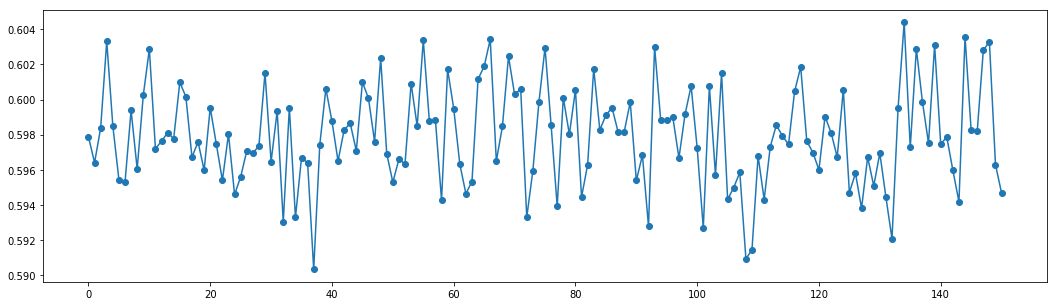

In [148]:
plt.figure(figsize=(18,5))
plt.plot(rf_scores,'-o')

In [139]:
import time

try:
    print(time.ctime())
except:
    pass

Sat Apr 20 10:22:01 2019


In [151]:
del ts, ts_feat
gc.collect()

10627

In [3]:
import pandas as pd
import numpy as snp
import glob

int_inter_2way = glob.glob('store_data/new_feat/int_inter_2way/*')
int_inter_3way = glob.glob('store_data/new_feat/int_inter_3way/*')
len(int_inter_2way), len(int_inter_3way)

(15, 137)

In [4]:
total_feat = 0
feature_df = pd.DataFrame()
idx = 0
for file_no,file in enumerate(int_inter_2way):
    if feature_df.shape[1] > 100:
        print(feature_df.shape, "==>", end=" ")
        file_name = 'store_data/new_feat/int_inter_2way_new/cat_inter_2way_'+str(idx)+'.csv'
        feature_df.iloc[:,:100].to_csv(file_name, index=None)
        feature_df = feature_df.iloc[:,100:]
        print(feature_df.shape)
        idx += 1
        
    feat = pd.read_csv(file)
    
#     ####### Label Encoding ########
#     le = LabelEncoder()
#     feat.fillna(0, inplace=True)
#     for col in feat.columns:
#         try:
#             feat[col] = le.fit_transform(feat[col])
#         except:
#             print(file, "==", col)
#     ####### Label Encoding ########
    
    feature_df = pd.concat([feature_df, feat], axis=1)
    print(file_no, "==", file)
    
print(feature_df.shape, "==>", end=" ")
file_name = 'store_data/new_feat/int_inter_2way_new/cat_inter_2way_'+str(idx)+'.csv'
feature_df.to_csv(file_name, index=None)
print(feature_df.shape)
print("===========finish===========")

0 == store_data/new_feat/int_inter_2way/num_inter_2way_200.csv
1 == store_data/new_feat/int_inter_2way/num_inter_2way_440.csv
2 == store_data/new_feat/int_inter_2way/num_inter_2way_400.csv
3 == store_data/new_feat/int_inter_2way/num_inter_2way_520.csv
4 == store_data/new_feat/int_inter_2way/num_inter_2way_280.csv
5 == store_data/new_feat/int_inter_2way/num_inter_2way_594.csv
(345546, 194) ==> (345546, 94)
6 == store_data/new_feat/int_inter_2way/num_inter_2way_120.csv
7 == store_data/new_feat/int_inter_2way/num_inter_2way_320.csv
(345546, 104) ==> (345546, 4)
8 == store_data/new_feat/int_inter_2way/num_inter_2way_560.csv
9 == store_data/new_feat/int_inter_2way/num_inter_2way_240.csv
10 == store_data/new_feat/int_inter_2way/num_inter_2way_360.csv
11 == store_data/new_feat/int_inter_2way/num_inter_2way_80.csv
12 == store_data/new_feat/int_inter_2way/num_inter_2way_40.csv
13 == store_data/new_feat/int_inter_2way/num_inter_2way_480.csv
14 == store_data/new_feat/int_inter_2way/num_inter_2way

In [6]:
total_feat = 0
feature_df = pd.DataFrame()
idx = 0
for file_no,file in enumerate(int_inter_3way):
    if feature_df.shape[1] > 100:
        print(feature_df.shape, "==>", end=" ")
        file_name = 'store_data/new_feat/int_inter_3way_new/cat_inter_3way_'+str(idx)+'.csv'
        feature_df.iloc[:,:100].to_csv(file_name, index=None)
        feature_df = feature_df.iloc[:,100:]
        print(feature_df.shape)
        idx += 1
        
    try:
        feat = pd.read_csv(file)
    except:
        print("===",file,"===empty file")
        pass
#     ####### Label Encoding ########
#     le = LabelEncoder()
#     feat.fillna(0, inplace=True)
#     for col in feat.columns:
#         try:
#             feat[col] = le.fit_transform(feat[col])
#         except:
#             print(file, "==", col)
#     ####### Label Encoding ########
    
    feature_df = pd.concat([feature_df, feat], axis=1)
    print(file_no, "==", file)
    
print(feature_df.shape, "==>", end=" ")
file_name = 'store_data/new_feat/int_inter_3way_new/cat_inter_3way_'+str(idx)+'.csv'
feature_df.to_csv(file_name, index=None)
print(feature_df.shape)
print("===========finish===========")

0 == store_data/new_feat/int_inter_3way/num_inter_3way_680.csv
1 == store_data/new_feat/int_inter_3way/num_inter_3way_4960.csv
2 == store_data/new_feat/int_inter_3way/num_inter_3way_4360.csv
3 == store_data/new_feat/int_inter_3way/num_inter_3way_1640.csv
4 == store_data/new_feat/int_inter_3way/num_inter_3way_1760.csv
5 == store_data/new_feat/int_inter_3way/num_inter_3way_3720.csv
6 == store_data/new_feat/int_inter_3way/num_inter_3way_1440.csv
7 == store_data/new_feat/int_inter_3way/num_inter_3way_3000.csv
8 == store_data/new_feat/int_inter_3way/num_inter_3way_2160.csv
9 == store_data/new_feat/int_inter_3way/num_inter_3way_3680.csv
=== store_data/new_feat/int_inter_3way/num_inter_3way_4760.csv ===empty file
10 == store_data/new_feat/int_inter_3way/num_inter_3way_4760.csv
11 == store_data/new_feat/int_inter_3way/num_inter_3way_2480.csv
12 == store_data/new_feat/int_inter_3way/num_inter_3way_2560.csv
13 == store_data/new_feat/int_inter_3way/num_inter_3way_3280.csv
14 == store_data/new_fea

112 == store_data/new_feat/int_inter_3way/num_inter_3way_640.csv
113 == store_data/new_feat/int_inter_3way/num_inter_3way_480.csv
114 == store_data/new_feat/int_inter_3way/num_inter_3way_2600.csv
115 == store_data/new_feat/int_inter_3way/num_inter_3way_3760.csv
116 == store_data/new_feat/int_inter_3way/num_inter_3way_5320.csv
117 == store_data/new_feat/int_inter_3way/num_inter_3way_160.csv
118 == store_data/new_feat/int_inter_3way/num_inter_3way_80.csv
119 == store_data/new_feat/int_inter_3way/num_inter_3way_3080.csv
120 == store_data/new_feat/int_inter_3way/num_inter_3way_320.csv
121 == store_data/new_feat/int_inter_3way/num_inter_3way_1160.csv
122 == store_data/new_feat/int_inter_3way/num_inter_3way_3880.csv
123 == store_data/new_feat/int_inter_3way/num_inter_3way_1960.csv
(345546, 102) ==> (345546, 2)
124 == store_data/new_feat/int_inter_3way/num_inter_3way_1120.csv
125 == store_data/new_feat/int_inter_3way/num_inter_3way_5400.csv
126 == store_data/new_feat/int_inter_3way/num_inter_

In [136]:
# count = 0
# for idx,inter in enumerate(list(combinations(int_cols_new, 3))):
#     if idx%16 == 0:
#         if idx != 0:
#             print(idx, "==", end=" ")
#             file_name = 'store_data/new_feat/num_inter_3way_'+str(idx)+'.csv'
#             feature_df.to_csv(file_name, index=None)
#             print(file_name)
#         feature_df = pd.DataFrame()
#         gc.collect()
#         print(idx)
#     new_col_name1 = "+".join(inter)
#     new_col_name2 = "-".join(inter)
#     new_col_name3 = "*".join(inter)
#     new_col_name4 = "/".join(inter)+'_pre'
#     new_col_name5 = "/".join(inter)+'_post'
    
#     feature_df[new_col_name1] = complete_df[inter[0]] + complete_df[inter[1]] + complete_df[inter[2]]
#     feature_df[new_col_name2] = complete_df[inter[0]] - complete_df[inter[1]] - complete_df[inter[2]]
#     feature_df[new_col_name3] = complete_df[inter[0]] * complete_df[inter[1]] * complete_df[inter[2]]
#     feature_df[new_col_name4] = complete_df[inter[0]] / (1+complete_df[inter[1]]) / (1+complete_df[inter[2]])
#     feature_df[new_col_name5] = complete_df[inter[2]] / (1+complete_df[inter[1]]) / (1+complete_df[inter[0]])
    
#     count += 1
# file_name = 'store_data/new_feat/num_inter_3way_'+str(idx)+'.csv'
# print(idx, "==", end=" ")
# print(file_name)

# print(count)



0
16 == store_data/new_feat/num_inter_3way_16.csv
16
32 == store_data/new_feat/num_inter_3way_32.csv
32
48 == store_data/new_feat/num_inter_3way_48.csv
48
64 == store_data/new_feat/num_inter_3way_64.csv
64
80 == store_data/new_feat/num_inter_3way_80.csv
80
96 == store_data/new_feat/num_inter_3way_96.csv
96
112 == store_data/new_feat/num_inter_3way_112.csv
112
128 == store_data/new_feat/num_inter_3way_128.csv
128
144 == store_data/new_feat/num_inter_3way_144.csv
144
160 == store_data/new_feat/num_inter_3way_160.csv
160
176 == store_data/new_feat/num_inter_3way_176.csv
176
192 == store_data/new_feat/num_inter_3way_192.csv
192
208 == store_data/new_feat/num_inter_3way_208.csv
208
224 == store_data/new_feat/num_inter_3way_224.csv
224
240 == store_data/new_feat/num_inter_3way_240.csv
240
256 == store_data/new_feat/num_inter_3way_256.csv
256
272 == store_data/new_feat/num_inter_3way_272.csv
272
285 == store_data/new_feat/num_inter_3way_285.csv
286


In [49]:
list(combinations(['a','b','c'], 2))

[('a', 'b'), ('a', 'c'), ('b', 'c')]

In [ ]:
print("len of interst cols: ", len(intersting_cols))

print(train_df.shape, "==>", end=" ")
for i in range(len(intersting_cols)-1):
    col1 = intersting_cols[i]
    for j in range(i+1,len(intersting_cols)):
        col2 = intersting_cols[j]
        train_df[col1+':'+col2] = train_df[col1]+':'+train_df[col2]
        test_df[col1+':'+col2]  = test_df[col1]+':'+test_df[col2]
        
print(train_df.shape)

len of interst cols:  36
(224607, 46) ==> 

In [26]:
print("len of interst cols: ", len(intersting_cols))

for i in range(len(intersting_cols)-1):
    feature_df = pd.DataFrame()
    col1 = intersting_cols[i]
    for j in range(i+1,len(intersting_cols)):
        col2 = intersting_cols[j]
        feature_df[col1+':'+col2] = complete_df[col1]+':'+complete_df[col2]
    
    feature_df.to_csv('store_data/new_feat/cat_inter_2way_'+str(i)+'.csv', index=None)
    print(feature_df.shape)
    
#         train_df[col1+':'+col2] = train_df[col1]+':'+train_df[col2]
#         test_df[col1+':'+col2]  = test_df[col1]+':'+test_df[col2]
        
print(train_df.shape)

len of interst cols:  36
(336999, 35)
(336999, 34)
(336999, 33)
(336999, 32)
(336999, 31)
(336999, 30)
(336999, 29)
(336999, 28)
(336999, 27)
(336999, 26)
(336999, 25)
(336999, 24)
(336999, 23)
(336999, 22)
(336999, 21)
(336999, 20)
(336999, 19)
(336999, 18)
(336999, 17)
(336999, 16)
(336999, 15)
(336999, 14)
(336999, 13)
(336999, 12)
(336999, 11)
(336999, 10)
(336999, 9)
(336999, 8)
(336999, 7)
(336999, 6)
(336999, 5)
(336999, 4)
(336999, 3)
(336999, 2)
(336999, 1)
(224607, 46)


In [ ]:
count = 0
print("len of interst cols: ", len(intersting_cols))
for i in range(len(intersting_cols)-2):
    print(i,"==>", end=" ")
    for j in range(i+1,len(intersting_cols)-1):
        print(j, "==>", end=" ")
        for k in range(j+1,len(intersting_cols)):
            print(k, end=" ")
        
        print(" ")
        count += 1
    print(" ")

In [ ]:
count = 0
file_name_3way = []
print("len of interst cols: ", len(intersting_cols))
for i in range(len(intersting_cols)-2):
    col1 = intersting_cols[i]

    for j in range(i+1,len(intersting_cols)-1):
        col2 = intersting_cols[j]

        feature_df = pd.DataFrame()
        for k in range(j+1,len(intersting_cols)):
            col3 = intersting_cols[k]
            feature_df[col1+':'+col2+':'+col3] = complete_df[col1]+':'+complete_df[col2]+':'+complete_df[col3]
        file_name = 'store_data/new_feat/cat_inter_3way_'+str(i)+'_'+str(j)+'.csv'
        feature_df.to_csv(file_name, index=None)
        file_name_3way.append(file_name)
#         print(feature_df.shape)
    
    print("done interaction till: ",i)

len of interst cols:  36
done interaction till:  0
done interaction till:  1


In [ ]:
print("len of interst cols: ", len(intersting_cols))

for i in range(len(intersting_cols)-1):
    feature_df = pd.DataFrame()
    col1 = intersting_cols[i]
    for j in range(i+1,len(intersting_cols)):
        col2 = intersting_cols[j]
        feature_df[col1+':'+col2] = complete_df[col1]+':'+complete_df[col2]
    
    feature_df.to_csv('store_data/new_feat/cat_inter_2way_'+str(i)+'.csv', index=None)
    print(feature_df.shape)
    
#         train_df[col1+':'+col2] = train_df[col1]+':'+train_df[col2]
#         test_df[col1+':'+col2]  = test_df[col1]+':'+test_df[col2]
        
print(train_df.shape)

In [25]:
!ls store_data/new_feat/

feature_df_0.csv


In [ ]:
tp_save = []
sing_values = []
from sklearn.decomposition import TruncatedSVD

columns_shuffle = np.random.permutation(pca_cat.shape[1])
for i in range(20):
    print(i+1)
    select_cols = columns_shuffle[150*i:150*(i+1)]
#     print(pca_cat.iloc[:,select_cols].shape)
    svd = TruncatedSVD(n_components=3)
    tp = svd.fit_transform(pca_cat.iloc[:,select_cols])
    tp_save.append(tp)
    sing_values.append(svd.singular_values_)
